# Load data

In [1]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# combined data
# load processed data
train_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_mean_mode.csv')
train_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_latest.csv')
train_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_entropy_std.csv')
train_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_min.csv')
train_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_max.csv')
train_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q1.csv')
train_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_q3.csv')
train_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_kurtosis.csv')
train_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_skewness.csv')
train_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_range.csv')
train_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/train/train_valid_iqr.csv')
train_latest = train_latest.drop(train_latest.columns[0:13], axis=1)
train_dispers = train_dispers.drop(train_dispers.columns[0:13], axis=1)
train_min = train_min.drop(train_min.columns[0:13], axis=1)
train_max = train_max.drop(train_max.columns[0:13], axis=1)
train_q1 = train_q1.drop(train_q1.columns[0:13], axis=1)
train_q3 = train_q3.drop(train_q3.columns[0:13], axis=1)
train_kurtois = train_kurtosis.drop(train_kurtosis.columns[0:13], axis=1)
train_skewness = train_skewness.drop(train_skewness.columns[0:13], axis=1)
train_range = train_range.drop(train_range.columns[0:13], axis=1)
train_iqr = train_iqr.drop(train_iqr.columns[0:13], axis=1)

# merge train_ and train_latest
train = pd.concat([train_mean, train_latest, train_dispers, train_min, train_max], axis=1)

# load processed data
test_mean = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_mean_mode.csv')
test_latest = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_latest.csv')
test_dispers = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_entropy_std.csv')
test_min = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_min.csv')
test_max = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_max.csv')
test_q1 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q1.csv')
test_q3 = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_q3.csv')
test_kurtosis = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_kurtosis.csv')
test_skewness = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_skewness.csv')
test_range = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_range.csv')
test_iqr = pd.read_csv('https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/data_processing/test/test_iqr.csv')
test_latest = test_latest.drop(test_latest.columns[0:12], axis=1)
test_dispers = test_dispers.drop(test_dispers.columns[0:12], axis=1)
test_min = test_min.drop(test_min.columns[0:12], axis=1)
test_max = test_max.drop(test_max.columns[0:12], axis=1)
test_q1 = test_q1.drop(test_q1.columns[0:12], axis=1)
test_q3 = test_q3.drop(test_q3.columns[0:12], axis=1)
test_kurtosis = test_kurtosis.drop(test_kurtosis.columns[0:12], axis=1)
test_skewness = test_skewness.drop(test_skewness.columns[0:12], axis=1)
test_range = test_range.drop(test_range.columns[0:12], axis=1)
test_iqr = test_iqr.drop(test_iqr.columns[0:12], axis=1)

# merge train_mean and train_latest
test = pd.concat([test_mean, test_latest, test_dispers, test_min, test_max], axis=1)

In [3]:
train = train.drop(train.columns[11], axis=1)
test = test.drop(test.columns[11], axis=1)

In [4]:
x_train = train.iloc[:,12:]
y_train = train.iloc[:,11]

#!wget https://raw.githubusercontent.com/zxyao5148/STAT3612_2023_1A_GroupProject/main/code_base/adjust_imbl.py
#from adjust_imbl import adjust_imbl
#x_train, y_train = adjust_imbl(x_train, y_train)

x_test = test.iloc[:,11:]

# Train model

In [5]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [8]:
!pip install tpot
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=2ca0e310acb6e5e2504af7625cc6a5aea5ff37cbcccd9bd414a37ce59f1ae15b
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.3 MB/s eta 0:00:00


In [9]:
from skopt import BayesSearchCV, plots
from skopt.space import Real, Categorical, Integer

In [10]:
# Define the parameter space for CatBoost
catboost_param_space = {
    'learning_rate': Real(0.001, 0.01, prior='log-uniform'),
    'n_estimators': Integer(200, 800),
    'depth': Integer(4, 8),
}

# Create the CatBoost model
catboost = CatBoostClassifier()

# Perform Bayesian optimization for CatBoost
opt_catboost = BayesSearchCV(catboost, catboost_param_space, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the CatBoost model
opt_catboost.fit(x_train, y_train)

# Get the best hyperparameters for CatBoost
best_params_catboost = opt_catboost.best_params_
best_auc_catboost = opt_catboost.best_score_
print("Best hyperparameters for CatBoost:", best_params_catboost)
print("Best AUC for CatBoost: %.4f" % best_auc_catboost)


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

0:	learn: 0.6865619	total: 117ms	remaining: 1m 33s
1:	learn: 0.6801422	total: 170ms	remaining: 1m 7s
2:	learn: 0.6737941	total: 233ms	remaining: 1m 1s
3:	learn: 0.6678605	total: 304ms	remaining: 1m
4:	learn: 0.6618653	total: 362ms	remaining: 57.6s
5:	learn: 0.6555322	total: 420ms	remaining: 55.6s
6:	learn: 0.6498012	total: 474ms	remaining: 53.7s
7:	learn: 0.6434508	total: 530ms	remaining: 52.5s
8:	learn: 0.6382007	total: 590ms	remaining: 51.9s
9:	learn: 0.6326567	total: 648ms	remaining: 51.2s
10:	learn: 0.6274472	total: 705ms	remaining: 50.6s
11:	learn: 0.6221285	total: 761ms	remaining: 50s
12:	learn: 0.6170029	total: 823ms	remaining: 49.8s
13:	learn: 0.6119806	total: 880ms	remaining: 49.4s
14:	learn: 0.6071516	total: 936ms	remaining: 49s
15:	learn: 0.6024732	total: 990ms	remaining: 48.5s
16:	learn: 0.5975878	total: 1.05s	remaining: 48.4s
17:	learn: 0.5924930	total: 1.11s	remaining: 48.1s
18:	learn: 0.5883584	total: 1.16s	remaining: 47.8s
19:	learn: 0.5838723	total: 1.22s	remaining: 47

array([[<Axes: xlabel='depth', ylabel='Partial dependence'>, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='learning_rate'>,
        <Axes: xlabel='learning_rate', ylabel='Partial dependence'>,
        <Axes: >],
       [<Axes: xlabel='depth', ylabel='n_estimators'>,
        <Axes: xlabel='learning_rate'>,
        <Axes: xlabel='n_estimators', ylabel='Partial dependence'>]],
      dtype=object)

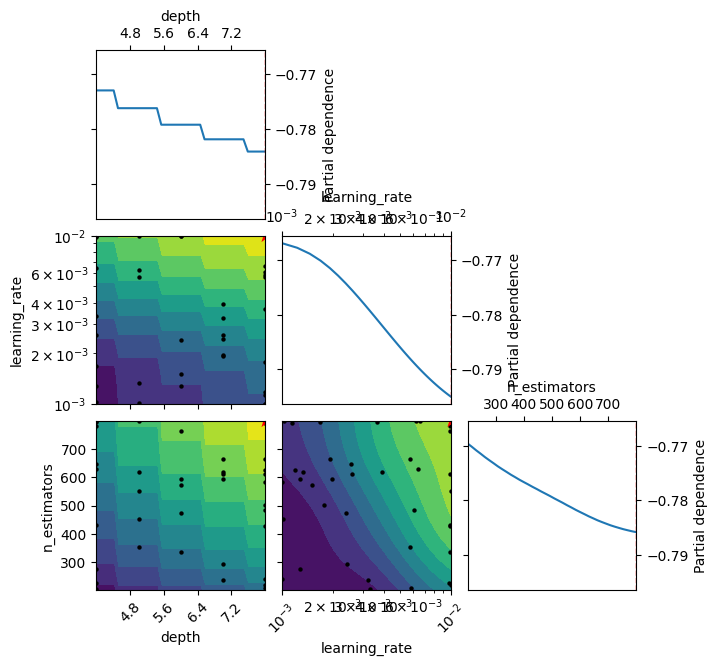

In [11]:
# objective plot
plots.plot_objective(opt_catboost.optimizer_results_[0])

array([[<Axes: xlabel='depth', ylabel='Number of samples'>, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='learning_rate'>,
        <Axes: xlabel='learning_rate', ylabel='Number of samples'>,
        <Axes: >],
       [<Axes: xlabel='depth', ylabel='n_estimators'>,
        <Axes: xlabel='learning_rate'>,
        <Axes: xlabel='n_estimators', ylabel='Number of samples'>]],
      dtype=object)

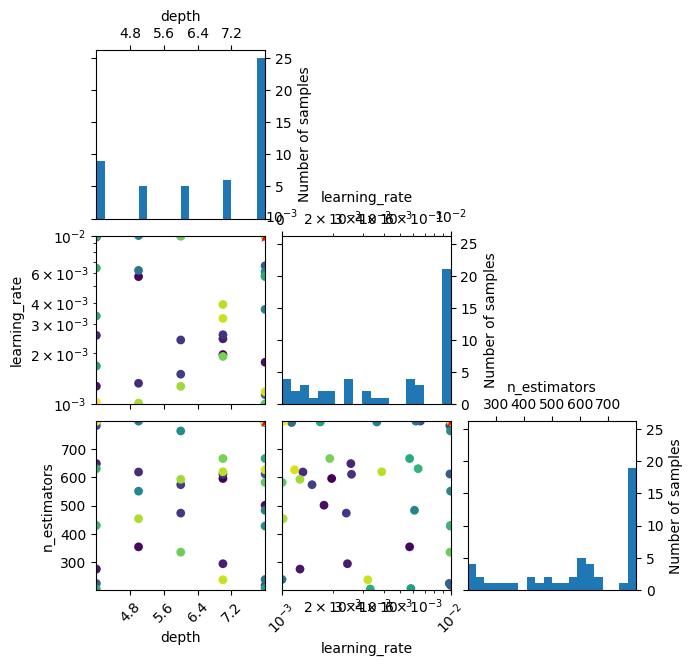

In [12]:
# evaluation plot
plots.plot_evaluations(opt_catboost.optimizer_results_[0])

# Export

In [14]:
y_pred_catboost=opt_catboost.predict_proba(x_test)[:, 1]

In [15]:
pred_catboost = pd.DataFrame(y_pred_catboost, columns=['readmitted_within_30days'])
merged_df = test[['id']].merge(pred_catboost, left_index=True, right_index=True)
merged_df.to_csv('pred_catboost.csv', index=False)

from google.colab import files
files.download('pred_catboost.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>